# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

### ¡Derrotero para el desarrollo del proyecto Sprint 4!

<font color="sienna">El objetivo del proyecto es identificar el ingreso promedio para los planes que ofrece el operador de telecomunicaciones Megaline, con el fin de evaluar la rentabilidad de cada uno. Esto permitirá enfocar la próxima campaña publicitaria para atraer a futuros clientes hacia el plan más rentable para la compañía.

Con este propósito, como analista designada para llevar a cabo el estudio, realizaré un escaneo de los archivos suministrados para tener una comprensión inicial de los datos. Mi objetivo es identificar posibles mejoras, como corregir tipos de datos, agregar o mejorar columnas, y realizar los cálculos pertinentes. Estos ajustes nos permitirán determinar el plan óptimo para la empresa; ya que se hará pruebas estadísticas que nos lleven a tomar la mejor alternativa.</font>

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_megaline_users = pd.read_csv('/datasets/megaline_users.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo con la importación de librerías y de datos.
</div>

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

df_megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

df_megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<font color="sienna"> Esta tabla será de gran utilidad para el desarrollo del proyecto, ya que contiene la información necesaria que determina el cobro mensual que se le hace a los usuarios por el consumo de minutos, mensajes e internet. </font>

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

df_megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprime una muestra de datos para usuarios

df_megaline_users.sample(9)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
29,1029,Franklyn,Henson,59,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-01-05,surf,NaN
113,1113,Spencer,Powers,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,ultimate,NaN
480,1480,Jasper,Buchanan,46,"St. Louis, MO-IL MSA",2018-12-13,surf,NaN
237,1237,Leighann,Wheeler,50,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-26,ultimate,NaN
97,1097,Deandre,Powell,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-26,surf,NaN
109,1109,Dominic,Salinas,41,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-16,surf,NaN
190,1190,Troy,Hutchinson,56,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",2018-08-01,ultimate,NaN
266,1266,Dorie,Chandler,62,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-13,surf,NaN
177,1177,Seymour,Anderson,33,"Seattle-Tacoma-Bellevue, WA MSA",2018-11-09,surf,NaN


### Corregir los datos

<font color="sienna"> Considerando que la compañía registra ingresos de manera mensual, independientemente del plan; se realizará una modificación de tipo de dato de las columnas que indican fechas, y se procederá a crear una columna `mes` de estas fechas con el fin de facilitar los cálculos. </font>

In [7]:
# Creación de variable numérica a partir de variable categórica.

df_megaline_users['churn_date'] = pd.to_datetime(df_megaline_users['churn_date'], errors='coerce')
df_megaline_users.loc[df_megaline_users['churn_date'].isnull(), 'churn_date'] = pd.NaT

### Enriquecer los datos

In [8]:
# Rellenar datos no nulos de tipo entero.

df_megaline_users['is_churned'] = df_megaline_users['churn_date'].notnull().astype(int)

## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

df_megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprime una muestra de datos para las llamadas

df_megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Corregir los datos

In [11]:
# Cambio de tipo de datos.

df_megaline_calls['duration'] = np.ceil(df_megaline_calls['duration']).astype(int)
df_megaline_calls['call_date'] = pd.to_datetime(df_megaline_calls['call_date'], errors='coerce')

### Enriquecer los datos

In [12]:
# Creación de variable para fines de calculos mensuales.

df_megaline_calls['month'] = df_megaline_calls['call_date'].dt.month

## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprime una muestra de datos para los mensajes

df_megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Corregir los datos

In [15]:
# Cambio: tipo de dato.

df_megaline_messages['message_date'] = pd.to_datetime(df_megaline_messages['message_date'], errors='coerce')

### Enriquecer los datos

In [16]:
# Creación de variable para fines de calculos mensuales.

df_megaline_messages['month'] = df_megaline_messages['message_date'].dt.month

## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet

df_megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Corregir los datos

In [19]:
# Cambio: tipo de dato.

df_megaline_internet['session_date'] = pd.to_datetime(df_megaline_internet['session_date'], errors='coerce')

### Enriquecer los datos

In [20]:
# Creación de variable para fines de calculos mensuales.

df_megaline_internet['month'] = df_megaline_internet['session_date'].dt.month

## Estudiar las condiciones de las tarifas

In [21]:
# Condiciones de las tarifas.

df_megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario


In [22]:
# Número de llamadas hechas y la cantidad de minutos usados por cada usuario al mes. 

calls_by_user = df_megaline_calls.pivot_table(index=['user_id', 'month'],
                                               values='duration',
                                               aggfunc=['count', 'sum']
                                              )
calls_by_user.columns = ['numer_calls', 'total_minutes']
calls_by_user.reset_index(inplace=True)
calls_by_user

,user_id,month,numer_calls,total_minutes
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426
...,...,...,...,...
2253,1498,12,39,339
2254,1499,9,41,346
2255,1499,10,53,385
2256,1499,11,45,308


In [23]:
# Número de mensajes enviados por cada usuario al mes. 

messages_by_user = df_megaline_messages.pivot_table(index=['user_id', 'month'],
                                                    values= 'message_date', 
                                                    aggfunc='count'
                                                   )

messages_by_user.columns = ['total_messages']
messages_by_user.reset_index(inplace=True)
messages_by_user

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [24]:
# Volumen de tráfico de Internet usado por cada usuario al mes. 

internet_by_user = df_megaline_internet.pivot_table(index=['user_id', 'month'], 
                                                    values='mb_used', 
                                                    aggfunc='sum'
                                                   )
internet_by_user.columns = ['total_mb']
internet_by_user.reset_index(inplace=True)


<font color="sienna"> Después de realizar el análisis preliminar de las tablas, se hará la consolidación de los datos con el objetivo de calcular los ingresos derivados del uso de cada plan. Este paso nos permitirá alcanzar las conclusiones deseadas para el proyecto, y lanzar al mercado el plan de más beneficio para la compañía en aras de mejor la rentabilidad. </front>

In [25]:
# Fusión los datos de llamadas, minutos, mensajes e Internet con base en user_id y month.

data_usage_df = pd.merge(pd.merge(calls_by_user, messages_by_user, on=['user_id', 'month'], how='outer'), internet_by_user, on=['user_id', 'month'], how='outer')
data_usage_df

,user_id,month,numer_calls,total_minutes,total_messages,total_mb
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91
2289,1361,5,NaN,NaN,2.0,1519.69
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,233.17


In [26]:
# Información de la tarifa

data_plan_used = pd.merge(data_usage_df, df_megaline_users[['user_id', 'plan']], on='user_id', how='left').merge(df_megaline_plans, left_on='plan', right_on='plan_name')


In [27]:
# Ingreso mensual por cada usuario.


# Primero se identificará el exceso de uso ya sea en minutos, mensajes, o internet. (Creación de variables)
data_plan_used['over_minutes'] = np.where(data_plan_used['total_minutes'] - data_plan_used['minutes_included'] > 0, 
                                          data_plan_used['total_minutes'] - data_plan_used['minutes_included'], 0)

data_plan_used['over_messages'] = np.where(data_plan_used['total_messages'] - data_plan_used['messages_included'] > 0, 
                                           data_plan_used['total_messages'] - data_plan_used['messages_included'], 0)

data_plan_used['over_gbs'] = np.where(data_plan_used['total_mb'] - data_plan_used['mb_per_month_included'] > 0, 
                                       data_plan_used['total_mb'] - data_plan_used['mb_per_month_included'], 0) / 1024

# Redondeo columna mb_used.
data_plan_used['over_gbs'] = np.ceil(data_plan_used['over_gbs']).astype(int)


# Calculo del ingreso extra al plan por los gastos que excedieron el plan. 
data_plan_used['income_minutes'] = (data_plan_used['over_minutes'] * data_plan_used['usd_per_minute'])
data_plan_used['income_messages'] = (data_plan_used['over_minutes'] * data_plan_used['usd_per_message'])
data_plan_used['income_gbs'] = (data_plan_used['over_gbs'] * data_plan_used['usd_per_gb'])


# Convirtiendo NaN a valor 0 para ejecutar operaciones.
data_plan_used.fillna(0, inplace=True)


# Calculo del ingreso extra por uso extra del plan.
data_plan_used['total_income'] = data_plan_used['usd_monthly_pay'] + data_plan_used['income_minutes'] + data_plan_used['income_messages'] + data_plan_used['income_gbs']

data_plan_used.sort_values(by='user_id')

,user_id,month,numer_calls,total_minutes,total_messages,total_mb,plan,messages_included,mb_per_month_included,minutes_included,...,usd_per_message,usd_per_minute,plan_name,over_minutes,over_messages,over_gbs,income_minutes,income_messages,income_gbs,total_income
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,...,0.01,0.01,ultimate,0.0,0.0,0,0.0,0.0,0,70.0
724,1001,12,56.0,412.0,44.0,19369.18,surf,50,15360,500,...,0.03,0.03,surf,0.0,0.0,4,0.0,0.0,40,60.0
723,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,...,0.03,0.03,surf,0.0,0.0,4,0.0,0.0,40,60.0
722,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,...,0.03,0.03,surf,0.0,3.0,7,0.0,0.0,70,90.0
720,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,...,0.03,0.03,surf,0.0,0.0,0,0.0,0.0,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,1498,12,39.0,339.0,0.0,23137.69,surf,50,15360,500,...,0.03,0.03,surf,0.0,0.0,8,0.0,0.0,80,100.0
2261,1499,9,41.0,346.0,0.0,12984.76,surf,50,15360,500,...,0.03,0.03,surf,0.0,0.0,0,0.0,0.0,0,20.0
2264,1499,12,65.0,496.0,0.0,22059.21,surf,50,15360,500,...,0.03,0.03,surf,0.0,0.0,7,0.0,0.0,70,90.0
2262,1499,10,53.0,385.0,0.0,19492.43,surf,50,15360,500,...,0.03,0.03,surf,0.0,0.0,5,0.0,0.0,50,70.0


## Estudia el comportamiento de usuario

<font color='sienna'> Calculo de algunas estadísticas descriptivas para los datos agregados y fusionados, y gráficas útiles para facilitar la comprensión de la informaición. 
Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas se calcularán por tarifa.</font>

### Llamadas

<AxesSubplot:xlabel='month'>

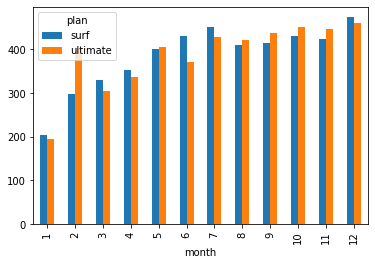

In [29]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

def plot_average (values):
    return data_plan_used.pivot_table(index='month', columns='plan', values=values, aggfunc='mean').plot(kind='bar')

plot_average('total_minutes')

In [30]:
data_plan_used.loc[data_plan_used['plan'] == 'surf'][['total_minutes', 'total_messages', 'total_mb', 'total_income']].mean()

total_minutes       428.749523
total_messages       31.159568
total_mb          16577.755245
total_income         59.447315
dtype: float64

In [31]:
data_plan_used.loc[data_plan_used['plan'] == 'ultimate'][['total_minutes', 'total_messages', 'total_mb', 'total_income']].mean()

total_minutes       430.450000
total_messages       37.551389
total_mb          17234.643056
total_income         72.129290
dtype: float64

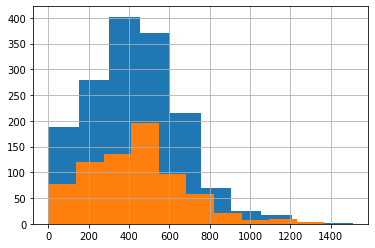

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

def histogram_plan (columns):
    data_plan_used[data_plan_used['plan'] == 'surf'][columns].hist()
    data_plan_used[data_plan_used['plan'] == 'ultimate'][columns].hist()
    
histogram_plan('total_minutes')

In [33]:
df_megaline_users[df_megaline_users['plan'] == 'surf'].count()


user_id       339
first_name    339
last_name     339
age           339
city          339
reg_date      339
plan          339
churn_date     23
is_churned    339
dtype: int64

In [34]:
df_megaline_users[df_megaline_users['plan'] == 'ultimate'].count()

user_id       161
first_name    161
last_name     161
age           161
city          161
reg_date      161
plan          161
churn_date     11
is_churned    161
dtype: int64

Cálculo la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [35]:
# Calcula la media y la varianza de la duración mensual de llamadas.

def calc_stats (column):
    return data_plan_used.groupby(['plan', 'month']).agg({column:['mean', 'var']})
    
calc_stats('total_minutes')

total_minutes              
                        mean           var
plan     month                            
surf     1        203.000000  15842.000000
         2        297.000000  52226.500000
         3        330.000000  35809.363636
         4        351.540000  50866.743265
         5        399.584416  59754.219754
         6        431.298969  45592.628436
         7        449.983471  61005.099725
         8        410.111111  54344.645963
         9        414.226804  46595.958656
         10       429.729958  52278.664056
         11       423.325088  51607.021602
         12       473.836478  63629.518918
ultimate 1        193.500000  16572.333333
         2        403.142857  76889.476190
         3        304.250000  61984.931818
         4        336.857143  34888.928571
         5        406.241379  43841.046798
         6        370.957447  42503.563367
         7        427.067797  72563.374635
         8        421.436620  53645.506640
         9        437.511628  57070.464569
         10       450.735849  54261.910512
         11       445.196850  60593.222847
         12       459.099338  62503.783400

<AxesSubplot:title={'center':'total_minutes'}, xlabel='plan'>

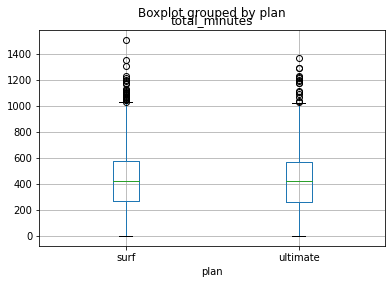

In [36]:
# Diagrama de caja para visualizar la distribución de la duración mensual de llamadas.

def box_plot_data (column):
    return data_plan_used.boxplot(column=column, by='plan')

box_plot_data('total_minutes')

<font color="sienna"> En relación al consumo mensual de llamadas, se evidencia claramente que el plan más beneficioso para la compañía es el Ultimate. Aunque el consumo de llamadas es muy similar en ambos planes, el Plan Ultimate tiene un costo aproximadamente un 70% más alto en comparación con el Plan Surf. Mientras que el Plan Surf tiene un costo mensual de 20 USD, el Plan Ultimate asciende a 70 USD. </font>

In [37]:
# Función que hace el llamado de las anteriores funciones, con el objetivo de repetir el proceso para mensajes e internet.

def call_funcions(column):
    histogram_plan(column)
    print(f'Media & varianza x {column} al mes')
    print("Histograma de consumo al mes")
    box_plot_data(column)
    print(f'Distribución de {column} al mes')
    plot_average(column)
    print(f'Promedio de {column} al mes')
    return calc_stats(column)

### Mensajes

Media & varianza x total_messages al mes
Histograma de consumo al mes
Distribución de total_messages al mes
Promedio de total_messages al mes


total_messages             
                         mean          var
plan     month                            
surf     1          10.500000   220.500000
         2          12.000000   386.000000
         3          15.260870   346.565217
         4          17.400000   501.591837
         5          24.012987   847.197198
         6          25.298969   914.920103
         7          27.033058   923.915565
         8          28.777778  1029.515528
         9          30.762887  1003.829496
         10         33.839662  1275.465708
         11         32.385159  1065.344034
         12         38.600629  1458.158612
ultimate 1          15.500000   313.666667
         2          21.571429   478.285714
         3          20.250000   654.386364
         4          22.047619   544.147619
         5          32.103448  1297.310345
         6          29.340426   857.620722
         7          32.830508   960.488019
         8          38.478873  1196.367404
         9          37.895349  1050.918331
         10         39.443396  1221.106289
         11         38.606299  1232.669166
         12         45.006623  1549.419956

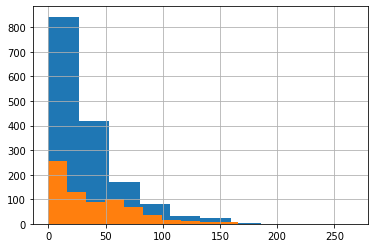

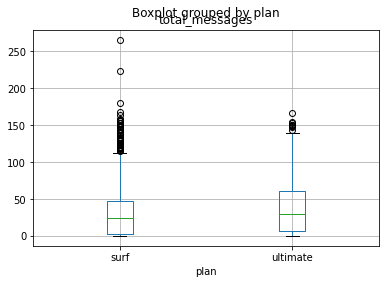

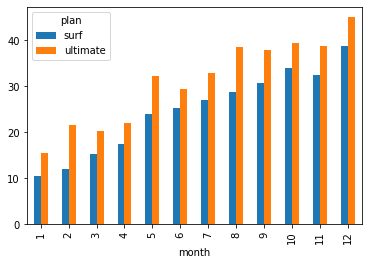

In [38]:
# Número de mensajes que tienden a enviar cada mes los usuarios de cada plan.

call_funcions('total_messages')

<font color="sienna"> El comportamiento de los planes con relación al consumo mensual de mensajería de los usuarios es poco significativo, por lo que está siendo más beneficioso para el plan `ultimate` a la hora de evaluar una campaña publicitaria. </font>

### Internet

Media & varianza x total_mb al mes
Histograma de consumo al mes
Distribución de total_mb al mes
Promedio de total_mb al mes


total_mb              
                        mean           var
plan     month                            
surf     1       4881.000000  1.827706e+07
         2      12192.888889  4.377810e+07
         3      13361.043478  6.839062e+07
         4      11998.200000  5.917602e+07
         5      13953.246753  6.160529e+07
         6      15319.567010  4.923752e+07
         7      16803.181818  6.481403e+07
         8      16814.864198  7.478647e+07
         9      16610.912371  5.141620e+07
         10     17331.721519  6.264899e+07
         11     16358.540636  5.728578e+07
         12     18153.786164  7.228513e+07
ultimate 1       6926.250000  1.642061e+07
         2      17148.857143  3.774840e+07
         3      18340.250000  1.406093e+08
         4      16140.476190  8.859513e+07
         5      16643.758621  5.689892e+07
         6      15355.106383  7.214565e+07
         7      16363.677966  6.855162e+07
         8      17834.887324  6.054714e+07
         9      16989.395349  4.941798e+07
         10     17633.188679  5.709523e+07
         11     17053.614173  5.769857e+07
         12     18344.735099  6.199779e+07

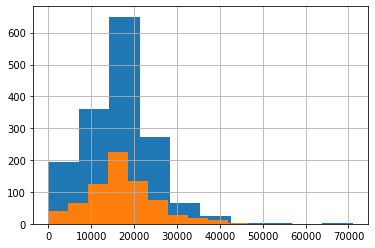

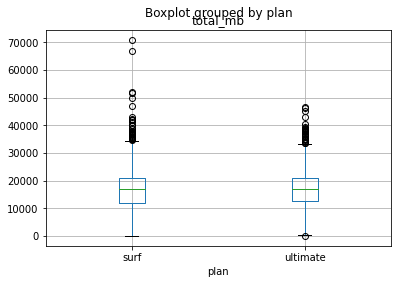

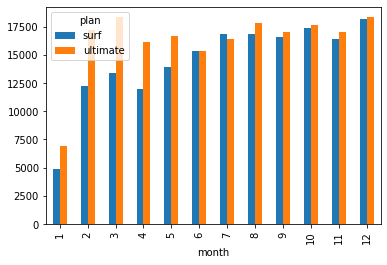

In [39]:
# Cantidad de tráfico de Internet consumido por usuarios por plan al mes.

call_funcions('total_mb')

<font color="sienna"> El comportamiento de los planes con relación al consumo mensual de internet es relativamente nulo, por lo que se sigue sugiriendo que el mejor plan en miras de rentabilidad es el de `ultimate`, ya que su consumo está muy parejo al límite de consumo del plan `surf`. </font>

## Ingreso

In [40]:
data_plan_used[data_plan_used['plan'] == 'surf']['total_income'].sum()

93510.626953125

In [41]:
data_plan_used[data_plan_used['plan'] == 'ultimate']['total_income'].sum()

51933.0888671875

Media & varianza x total_income al mes
Histograma de consumo al mes
Distribución de total_income al mes
Promedio de total_income al mes


total_income             
                       mean          var
plan     month                          
surf     1        20.000000     0.000000
         2        34.247812   376.412115
         3        44.527874  1440.552984
         4        40.119144  1112.024368
         5        47.367721  1910.384864
         6        47.836712  1912.786965
         7        61.822274  2981.326612
         8        62.622840  3578.438821
         9        56.637765  2156.169543
         10       63.717951  3119.943609
         11       56.979652  2408.706941
         12       69.199073  4614.713487
ultimate 1        70.000000     0.000000
         2        70.000000     0.000000
         3        73.444743   110.572900
         4        72.794271   114.051124
         5        70.523774     7.955844
         6        71.486016    59.841178
         7        71.858564   100.167942
         8        72.692685   138.132422
         9        71.824241    61.882792
         10       72.104759   152.695421
         11       71.610536    86.665576
         12       73.064084   196.996687

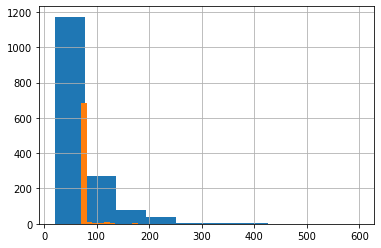

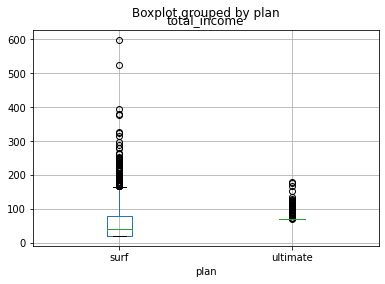

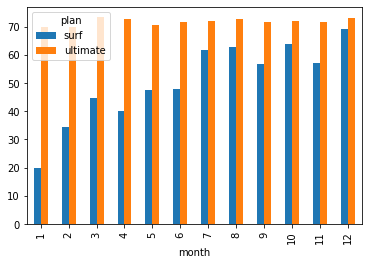

In [42]:
call_funcions('total_income')

<font color="sienna"> El plan 'Surf' cuenta actualmente con 339 usuarios, mientras que el plan 'Ultimate' tiene 161 usuarios. El promedio de ingresos mensuales es de 59 USD y 72 USD respectivamente por cliente. Al realizar un análisis previo, se observó que el consumo por cliente está muy cerca de la capacidad límite del plan 'Surf'. En consecuencia, se puede concluir que el plan más adecuado para la compañía sería el plan 'Ultimate'. </font>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con este análisis gráfico y buen detalle el haber utilizado una función para modularizar tu código.
</div>

## Prueba las hipótesis estadísticas

* Probar la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf; generar conclusiones.

In [48]:
# Prueba las hipótesis:

# Ho: No hay diferencia entre los ingreso promedio recibidos entre los planes.
# H¡: Hay diferencia entre el ingreso recibido por ambos planes.

# Realizar prueba t de Student con un α = 0.01.
clients_plan_surf = data_plan_used[data_plan_used['plan'] == 'surf']['total_income']
clients_plan_ultimate = data_plan_used[data_plan_used['plan'] == 'ultimate']['total_income']

# establece un nivel crítico de significación estadística:
alpha = 0.01

# Probar la hipótesis de que el ingreso promedio de las dos poblaciones independientes son iguales:
result = st.ttest_ind(clients_plan_surf, clients_plan_ultimate)
print('valor p:', result.pvalue)

# comparar el valor P obtenido con el nivel de significación estadística:
if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 9.704403673196331e-10
Rechazamos la hipótesis nula


* Pruebar la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [50]:
# Prueba las hipótesis

# Ho: No hay diferencia entre los ingreso promedio recibido entre los usuarios de NY-NJ, y el resto de states.
# H¡: Hay diferencia entre el ingreso recibido para ambos casos.

# Agregar la columna 'city' al DataFrame consolidado.
data_plan_city = pd.merge(data_plan_used, df_megaline_users[['user_id', 'city']], on='user_id', how='left')

# Prueba de hipótesis del ingreso promedio entre NY-NJ, y el resto de states.
clients_plan_ny_nj = data_plan_city[data_plan_city['city'].str.contains('NY-NJ')]['total_income']
clients_plan_other = data_plan_city[~data_plan_city['city'].str.contains('NY-NJ')]['total_income']
# establece un nivel crítico de significación estadística:
alpha = 0.01

# Probar la hipótesis de que el ingreso promedio de las dos poblaciones independientes son iguales:
result= st.ttest_ind(clients_plan_ny_nj, clients_plan_other)
print('valor p:', result.pvalue)

# comparar el valor P obtenido con el nivel de significación estadística:
if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula.")

valor p: 0.0373854656995741
No podemos rechazar la hipótesis nula.


## Conclusión general

<font color="sienna"> — El plan 'Surf' cuenta actualmente con 339 usuarios, mientras que el plan 'Ultimate' tiene 161 usuarios. El promedio de ingresos mensuales es de 59 USD y 72 USD respectivamente por cliente. Al realizar un análisis previo, se observó que el consumo por cliente está muy cerca de la capacidad límite del plan 'Surf'. A razón de esto, se puede concluir que el plan más adecuado para la compañía será el plan 'Ultimate', dejando este mayor rentabilidad. </font>

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Estefanía. Nos queda muy poco para poder aprobar tu proyecto. He dejado comentarios a lo largo del documento para ello.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido, Estefanía. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>